In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #plotting data
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#dataset = pd.read_csv('./data/dataset 3.csv')
#dataset[dataset['Target']!='Enrolled'].to_csv('./dataset.csv', index = False)

In [ ]:
dataset = pd.read_csv('./dataset.csv')

In [ ]:
dataset.head(10).T


,0,1,2,3,4,5,6,7,8,9
Marital status,1,1,1,1,2,2,1,1,1,1
Application mode,8,6,1,8,12,12,1,9,1,1
Application order,5,1,5,2,1,1,1,4,3,1
Course,2,11,5,15,3,17,12,11,10,10
Daytime/evening attendance,1,1,1,1,0,0,1,1,1,1
Previous qualification,1,1,1,1,1,12,1,1,1,1
Nacionality,1,1,1,1,1,1,1,1,15,1
Mother's qualification,13,1,22,23,22,22,13,22,1,1
Father's qualification,10,3,27,27,28,27,28,27,1,14
Mother's occupation,6,4,10,6,10,10,8,10,10,5


### Creating a function to convert a categorical column into a One-hot-encoded column

In [ ]:

def one_hot_encode(df, column_name):

    # Perform one-hot encoding using pandas get_dummies() function
    encoded_df = pd.get_dummies(df[column_name], prefix=column_name)

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    df = pd.concat([df, encoded_df], axis=1)

    # Drop the original column
    df.drop(column_name, axis=1, inplace=True)

    return df

### Exploring the features to keep for modelling
- since we have 4424 rows in the dataset, we will be evaluating individual columns of the dataset and decide which columns are relevant
- we will also have to combine a few social-economic indicators to derive new features

#### Description of the Marital status column
- 1 - single
- 2 - married
- 3 - widower
- 4 - divorced
- 5 - facto union
- 6 - legally separated

For the purpose of simplification of the columns, I am splitting encoding this column into 3 categories:
- Single
- Married
- Others


In [ ]:
def marital_status(x):
    if x == 1:
        return 'single'
    elif x == 2:
        return 'married'
    else:
        return 'others'

dataset['Marital status'] = dataset['Marital status'].apply(marital_status)

dataset = dataset.rename(columns={'Marital status': 'marital_status'})

dataset['marital_status'].value_counts()

single     3199
married     327
others      104
Name: marital_status, dtype: int64

### Application column

 - Application order (between 0 - first choice and 9 last choice)
 - We are categorizing the column values into three classes:
    - Priority 1 : Choices 0-3
    - Priority 2 : Choices 4-6
    - Priority 3 : Choices 7-9


In [ ]:
def application_order(val):
    if val in [0,1,2,3]:
        return 'Priority 1'
    elif val in [4,5,6]:
        return 'Priority 2'
    elif val in [7,8,9]:
        return 'Priority 3'

dataset['Application order'] = dataset['Application order'].apply(application_order)

dataset = dataset.rename(columns = {"Application order": "application_order"})

dataset['application_order'].value_counts()


Priority 1    3162
Priority 2     468
Name: application_order, dtype: int64

### Creating features from the parent qualifications

The dataset has a lot of information about the qualifications and occupations of both the parents
- We will build features to combine the categories into bigger categories for both father and mother

### Encoding qualifications

#### Original Columns
- 1 - Secondary Education - 12th Year of Schooling or Eq.
- 2 - Higher Education - Bachelor's Degree
- 3 - Higher Education - Degree
- 4 - Higher Education - Master's
- 5 - Higher Education - Doctorate
- 6 - Frequency of Higher Education
- 9 - 12th Year of Schooling - Not Completed
- 10 - 11th Year of Schooling - Not Completed
- 11 - 7th Year (Old)
- 12 - Other - 11th Year of Schooling
- 13 - 2nd year complementary high school course
- 14 - 10th Year of Schooling
- 18 - General commerce course
- 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
- 20 - Complementary High School Course
- 22 - Technical-professional course
- 25 - Complementary High School Course - not concluded
- 26 - 7th year of schooling
- 27 - 2nd cycle of the general high school course
- 29 - 9th Year of Schooling - Not Completed
- 30 - 8th year of schooling
- 31 - General Course of Administration and Commerce
- 33 - Supplementary Accounting and Administration
- 34 - Unknown
- 35 - Can't read or write
- 36 - Can read without having a 4th year of schooling
- 37 - Basic education 1st cycle (4th/5th year) or equiv.
- 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
- 39 - Technological specialization course
- 40 - Higher education - degree (1st cycle)
- 41 - Specialized higher studies course
- 42 - Professional higher technical course
- 43 - Higher Education - Master (2nd cycle)
- 44 - Higher Education - Doctorate (3rd cycle)

#### New Coded Features
- Can't read (35, 36)
- Schooling Complete if category (1)
- Schooling incomplete if categories (9, 10, 13, 11, 14, 19, 25, 26, 29, 30, 37, 38)
- Technical education if categories (22, 23, 39, 42)
- Bachelors Course, 1 if categories (2, 40, 41)
- Masters/Phd. Complete, 1 if categories (43, 44, 3, 4, 5)
- Others (34), Any other unselected category





#### Cleaning the Previous Qualification Columns

In [ ]:
dataset = dataset.rename(columns = {"Previous qualification": "previous_qualifications"})

def previous_qualification(vals):

    if vals in [9, 10, 12 , 14, 15, 19, 38]:
        return 'Schooling Incomplete'
    elif vals in [1]:
        return 'Schooling Complete'
    elif vals in [39, 40, 42]:
        return 'Technical Education'
    elif vals in [2, 3, 4, 5, 6, 43]:
        return 'Higher Studies'
    else:
        return 'Others'

dataset['previous_qualifications'] = dataset['previous_qualifications'].apply(previous_qualification)\

dataset['previous_qualifications'].value_counts()

Schooling Complete      3019
Schooling Incomplete     387
Higher Studies           167
Others                    57
Name: previous_qualifications, dtype: int64

In [ ]:
def encode_edu_category(vals):
    if vals in [35, 36]:
        return 'Cannot Read/Write'
    elif vals in [11, 25, 26, 29, 30, 37, 38]:
        return 'HS dropout or Below'
    elif vals in [9, 10, 13, 14, 19, 27, 28]:
        return 'HS Completed'
    elif vals in [1]:
        return 'Schooling Complete'
    elif vals in [22, 23, 39, 42]:
        return 'Technical Education Degree'
    elif (vals in [43, 44, 3, 4, 5]) or (vals in [2, 40, 41]):
        return 'Higher Education'
    else:
        return 'Others'

dataset["Mother's qualification"] = dataset["Mother's qualification"].apply(encode_edu_category)

dataset["Father's qualification"] = dataset["Father's qualification"].apply(encode_edu_category)

### Renaming the columns
#### Features for Occupation


#### Occupation based feature Categorization



In [ ]:
def occupation_based(vals):

    if vals in [1, 2, 122, 10, 123]:
        return 'category 1'
    elif vals in [3, 8, 131, 132, 134, 141, 143, 4]:
        return 'category 2'
    elif vals in [5, 6, 7, 144, 151, 152, 153, 171, 173, 175]:
        return 'category 3'
    elif vals in [191, 192, 193, 194, 9, 0, 90, 99]:
        return 'category 4'
    else:
        return 'Others'

dataset["Father's occupation"] = dataset["Father's occupation"].apply(occupation_based)

dataset["Mother's occupation"] = dataset["Mother's occupation"].apply(occupation_based)



In [ ]:
parent_occupation_education_columns = {"Mother's qualification":"M_qual",
                                       "Father's qualification":"F_qual",
                                       "Mother's occupation":"M_occu",
                                       "Father's occupation": "F_occu"}

dataset.rename(columns=parent_occupation_education_columns, inplace = True)


In [ ]:
dataset['M_qual'].value_counts()

Technical Education Degree    1311
HS Completed                   954
Schooling Complete             865
Higher Education               447
Others                          36
HS dropout or Below             17
Name: M_qual, dtype: int64

In [ ]:
dataset['F_qual'].value_counts()

HS Completed                  2416
Schooling Complete             732
Higher Education               310
Others                         141
HS dropout or Below             29
Technical Education Degree       2
Name: F_qual, dtype: int64

In [ ]:
dataset['M_occu'].value_counts()

category 1    1543
category 3    1183
category 2     736
Others         139
category 4      29
Name: M_occu, dtype: int64

In [ ]:
dataset['F_occu'].value_counts()

category 1    1083
category 2    1023
category 3     915
Others         346
category 4     263
Name: F_occu, dtype: int64

In [ ]:

ren_col_dict1 = {"Tuition fees up to date": "tuition_fee_upto_date"}

dataset = dataset.rename(columns = ren_col_dict1)

### Visualizing the Age of Enrollment vs. Target bar plot

In [ ]:
s1 = dataset[['Age at enrollment', 'Target']].copy()

## create age groups

def age_group(age):

    if age < 20:
        return 'less than 20'
    elif age < 25:
        return '20-25'
    elif age < 30:
        return '25-30'
    elif age < 35:
        return '30-35'
    elif age < 40:
        return '35-40'
    elif age < 45:
        return '40+'

s1['Age_category'] = s1['Age at enrollment'].apply(age_group)

s2 = s1.groupby(['Age_category', 'Target']).count().reset_index(drop=False).rename(columns={'Age at enrollment': 'Count'})

s2


,Age_category,Target,Count
0,20-25,Dropout,381
1,20-25,Graduate,652
2,25-30,Dropout,246
3,25-30,Graduate,109
4,30-35,Dropout,148
5,30-35,Graduate,84
6,35-40,Dropout,110
7,35-40,Graduate,61
8,40+,Dropout,52
9,40+,Graduate,45


####  Plotting the Target by Age of Enrollment

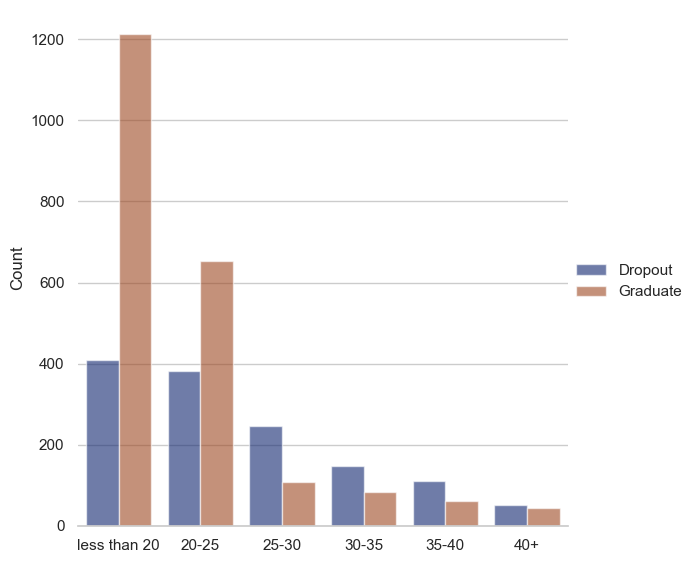

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=s2, kind="bar",
    x="Age_category", y="Count", hue="Target",
    errorbar="sd", palette="dark", alpha=.6, height=6, order=['less than 20', '20-25', '25-30', '30-35', '35-40', '40+']
)
g.despine(left=True)
#g.set_titles("DropOut by Age Group")
g.set_axis_labels("", "Count")
g.legend.set_title("")

In [ ]:
dataset.rename(columns = {"Age at enrollment": "enrollment_age"}, inplace=True)

dataset["enrollment_age"] = dataset["enrollment_age"]#.apply(age_group)

#dataset["enrollment_age"].value_counts()

#### Conclusion: It can be seen from here that Dropout rate goes up, for higher enrollment age buckets

### Number of Credits based features Renamed

#### Creating Dictionary of Features with and new names

In [ ]:

credits_based_features = ['Curricular units 1st sem (credited)',
                            'Curricular units 1st sem (enrolled)',
                            'Curricular units 1st sem (evaluations)',
                            'Curricular units 1st sem (approved)',
                            'Curricular units 1st sem (grade)',
                            'Curricular units 1st sem (without evaluations)',
                            'Curricular units 2nd sem (credited)',
                            'Curricular units 2nd sem (enrolled)',
                            'Curricular units 2nd sem (evaluations)',
                            'Curricular units 2nd sem (approved)',
                            'Curricular units 2nd sem (grade)',
                            'Curricular units 2nd sem (without evaluations)']

credit_features_renamed = ['1st_sem_crd',
                        '1st_sem_enrl',
                        '1st_sem_eval',
                        '1st_sem_appv',
                        '1st_sem_grade',
                        '1st_sem_w_eval',
                        '2nd_sem_crd',
                        '2nd_sem_enrl',
                        '2nd_sem_eval',
                        '2nd_sem_appv',
                        '2nd_sem_grade',
                        '2nd_sem_w_eval']

renaming_dict_credit_features = {}

for o, n in zip(credits_based_features, credit_features_renamed):
    renaming_dict_credit_features[o] = n


for k, v in zip(list(renaming_dict_credit_features.keys()), list(renaming_dict_credit_features.values())):
    print(k,' -> ', v)


dataset.rename(columns=renaming_dict_credit_features, inplace=True)

Curricular units 1st sem (credited)  ->  1st_sem_crd
Curricular units 1st sem (enrolled)  ->  1st_sem_enrl
Curricular units 1st sem (evaluations)  ->  1st_sem_eval
Curricular units 1st sem (approved)  ->  1st_sem_appv
Curricular units 1st sem (grade)  ->  1st_sem_grade
Curricular units 1st sem (without evaluations)  ->  1st_sem_w_eval
Curricular units 2nd sem (credited)  ->  2nd_sem_crd
Curricular units 2nd sem (enrolled)  ->  2nd_sem_enrl
Curricular units 2nd sem (evaluations)  ->  2nd_sem_eval
Curricular units 2nd sem (approved)  ->  2nd_sem_appv
Curricular units 2nd sem (grade)  ->  2nd_sem_grade
Curricular units 2nd sem (without evaluations)  ->  2nd_sem_w_eval


#### Checking Gender variable's relationship with Target

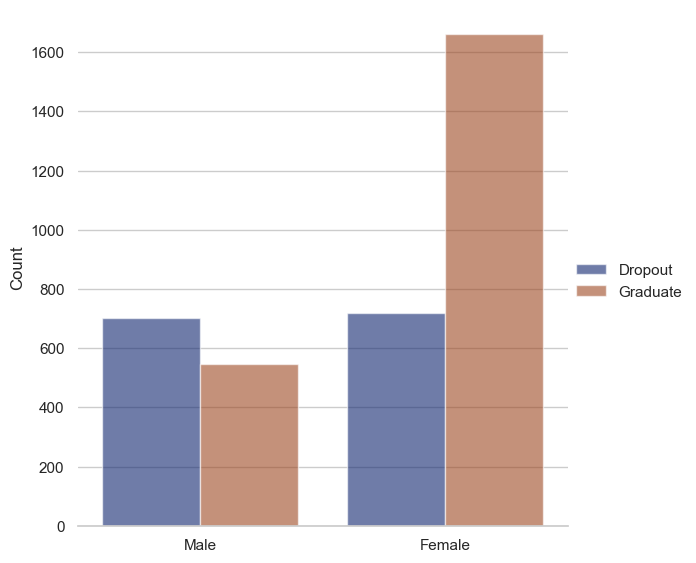

In [ ]:
import seaborn as sns

def create_bar_plot_w_categories(df, x_var, y_var, target_var, x_axis_label, order_x = None):

    '''
    df is the dataframe that would include the summarized dataset.
    x_var -> is the column which is being visualized
    y_var -> summarized stat column -> eg. count
    order
    '''

    sns.set_theme(style="whitegrid")

    g = sns.catplot(
        data=df,
        kind="bar",
        x = x_var,
        y = y_var,
        hue=target_var,
        errorbar="sd",
        palette="dark",
        alpha=.6,
        height=6,
        order=order_x
    )
    g.despine(left=True)
    #g.set_titles("DropOut by Age Group")
    g.set_axis_labels("", x_axis_label)
    g.legend.set_title("")



g_t_df = dataset[['Gender', 'Target', 'Nacionality']].copy()
g_t_df.replace({0:'Female', 1: 'Male'}, inplace=True)
gender_df = g_t_df.groupby(['Gender', 'Target'])['Nacionality'].count().reset_index().rename(columns = {'Nacionality':'count'})

create_bar_plot_w_categories(gender_df, 'Gender', 'count', 'Target', 'Count', order_x = ['Male', 'Female'])

#  Conclusion: The overall dataset has higher representation of females, yet females show a higher graduate rate.

#### Renaming the remaining columns to maintain consistent naming conventions

In [ ]:
renamed_colset_2 = {'Unemployment rate':'unemployment_rate',
                    'Inflation rate':'inflation_rate',
                    'GDP':'gdp',
                    'Target':'target',
                    'Course':'course',
                    'Daytime/evening attendance':'daytime_evening_attnd',
                    'M_qual':'m_qual',
                    'F_qual':'f_qual',
                    'M_occu':'m_occ',
                    'F_occu':'f_occ',
                    'Displaced': 'displaced',
                    'Educational special needs': 'special_needs',
                    'Debtor': 'debtor',
                    'Gender':'gender',
                    'Scholarship holder': 'scholarship_holder'}

df = dataset.rename(columns=renamed_colset_2)

In [ ]:
dataset_columns = ['marital_status', 'application_order',
       'daytime_evening_attnd', 'previous_qualifications',
       'm_qual', 'f_qual', 'm_occ', 'f_occ', 'displaced', 'special_needs',
       'debtor', 'tuition_fee_upto_date', 'gender', 'scholarship_holder',
       'enrollment_age', '1st_sem_crd', '1st_sem_enrl',
       '1st_sem_eval', '1st_sem_appv', '1st_sem_grade', '1st_sem_w_eval',
       '2nd_sem_crd', '2nd_sem_enrl', '2nd_sem_eval', '2nd_sem_appv',
       '2nd_sem_grade', '2nd_sem_w_eval', 'unemployment_rate',
       'inflation_rate', 'gdp', 'target']


df = df[dataset_columns]

In [ ]:
df.head(5)

,marital_status,application_order,daytime_evening_attnd,previous_qualifications,m_qual,f_qual,m_occ,f_occ,displaced,special_needs,...,2nd_sem_crd,2nd_sem_enrl,2nd_sem_eval,2nd_sem_appv,2nd_sem_grade,2nd_sem_w_eval,unemployment_rate,inflation_rate,gdp,target
0,single,Priority 2,1,Schooling Complete,HS Completed,HS Completed,category 3,category 1,1,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,Priority 1,1,Schooling Complete,Schooling Complete,Higher Education,category 2,category 2,1,0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,Priority 2,1,Schooling Complete,Technical Education Degree,HS Completed,category 1,category 1,1,0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,Priority 1,1,Schooling Complete,Technical Education Degree,HS Completed,category 3,category 2,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Priority 1,0,Schooling Complete,Technical Education Degree,HS Completed,category 1,category 1,0,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
dataset['previous_qualifications'].value_counts()

Schooling Complete      3019
Schooling Incomplete     387
Higher Studies           167
Others                    57
Name: previous_qualifications, dtype: int64

#### Applying One-hot-Encoding to selected Categorical Columns

In [ ]:

def one_hot_encode(df, column_names):
    '''
    This is able create one-hot-encodings for the columns passed in as parameters and then drops the columns
    '''
    for column_name in column_names:
        # Perform one-hot encoding using pandas get_dummies() function
        encoded_df = pd.get_dummies(df[column_name], prefix=column_name)

        # Concatenate the one-hot encoded DataFrame with the original DataFrame
        df = pd.concat([df, encoded_df], axis=1)

        # Drop the original column
        df.drop(column_name, axis=1, inplace=True)

        print(column_name, " Encoded and original column dropped")

    return df


cols_to_modify = ['marital_status', 'previous_qualifications', 'm_qual', 'f_qual',
                  'm_occ', 'f_occ', 'application_order']


df1 = one_hot_encode(df, cols_to_modify)

marital_status  Encoded and original column dropped
previous_qualifications  Encoded and original column dropped
m_qual  Encoded and original column dropped
f_qual  Encoded and original column dropped
m_occ  Encoded and original column dropped
f_occ  Encoded and original column dropped
application_order  Encoded and original column dropped


In [ ]:
df['marital_status'].value_counts()

single     3199
married     327
others      104
Name: marital_status, dtype: int64

#### Exploring the Nummeric columns


In [ ]:
numeric_cols = ['1st_sem_crd', '1st_sem_enrl', '1st_sem_eval', '1st_sem_appv',
            '1st_sem_grade', '1st_sem_w_eval', '2nd_sem_crd', '2nd_sem_enrl',
            '2nd_sem_eval', '2nd_sem_appv', '2nd_sem_grade', '2nd_sem_w_eval',
            'unemployment_rate', 'inflation_rate', 'gdp']

df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
1st_sem_crd,3630.0,0.754270,2.477277,0.00,0.000000,0.000000,0.00,20.000000
1st_sem_enrl,3630.0,6.337466,2.570773,0.00,5.000000,6.000000,7.00,26.000000
1st_sem_eval,3630.0,8.071074,4.286632,0.00,6.000000,8.000000,10.00,45.000000
1st_sem_appv,3630.0,4.791460,3.237845,0.00,3.000000,5.000000,6.00,26.000000
1st_sem_grade,3630.0,10.534860,5.057694,0.00,11.000000,12.341429,13.50,18.875000
1st_sem_w_eval,3630.0,0.128926,0.679111,0.00,0.000000,0.000000,0.00,12.000000
2nd_sem_crd,3630.0,0.581818,2.022688,0.00,0.000000,0.000000,0.00,19.000000
2nd_sem_enrl,3630.0,6.296419,2.263020,0.00,5.000000,6.000000,7.00,23.000000
2nd_sem_eval,3630.0,7.763085,3.964163,0.00,6.000000,8.000000,10.00,33.000000
2nd_sem_appv,3630.0,4.518457,3.162376,0.00,2.000000,5.000000,6.00,20.000000


In [ ]:
df1.columns

Index(['daytime_evening_attnd', 'displaced', 'special_needs', 'debtor',
       'tuition_fee_upto_date', 'gender', 'scholarship_holder',
       'enrollment_age', '1st_sem_crd', '1st_sem_enrl', '1st_sem_eval',
       '1st_sem_appv', '1st_sem_grade', '1st_sem_w_eval', '2nd_sem_crd',
       '2nd_sem_enrl', '2nd_sem_eval', '2nd_sem_appv', '2nd_sem_grade',
       '2nd_sem_w_eval', 'unemployment_rate', 'inflation_rate', 'gdp',
       'target', 'marital_status_married', 'marital_status_others',
       'marital_status_single', 'previous_qualifications_Higher Studies',
       'previous_qualifications_Others',
       'previous_qualifications_Schooling Complete',
       'previous_qualifications_Schooling Incomplete', 'm_qual_HS Completed',
       'm_qual_HS dropout or Below', 'm_qual_Higher Education',
       'm_qual_Others', 'm_qual_Schooling Complete',
       'm_qual_Technical Education Degree', 'f_qual_HS Completed',
       'f_qual_HS dropout or Below', 'f_qual_Higher Education',
       'f_qual

In [ ]:
x_cols = ['marital_status_married','marital_status_others', 'marital_status_single',
          'daytime_evening_attnd', 'displaced', 'special_needs',
            'debtor', 'tuition_fee_upto_date', 'gender', 'scholarship_holder',
            '1st_sem_crd', '1st_sem_enrl', '1st_sem_eval', '1st_sem_appv',
            '1st_sem_grade', '1st_sem_w_eval', '2nd_sem_crd', '2nd_sem_enrl',
            '2nd_sem_eval', '2nd_sem_appv', '2nd_sem_grade', '2nd_sem_w_eval',
            'unemployment_rate', 'inflation_rate', 'gdp',
            'previous_qualifications_Higher Studies',
            'previous_qualifications_Others',
            'previous_qualifications_Schooling Complete',
            'previous_qualifications_Schooling Incomplete', 'm_qual_HS Completed',
            'm_qual_HS dropout or Below', 'm_qual_Higher Education',
            'm_qual_Others', 'm_qual_Schooling Complete',
            'm_qual_Technical Education Degree', 'f_qual_HS Completed',
            'f_qual_HS dropout or Below', 'f_qual_Higher Education',
            'f_qual_Others', 'f_qual_Schooling Complete',
            'f_qual_Technical Education Degree', 'm_occ_Others', 'm_occ_category 1',
            'm_occ_category 2', 'm_occ_category 3', 'm_occ_category 4',
            'f_occ_Others', 'f_occ_category 1', 'f_occ_category 2',
            'f_occ_category 3', 'f_occ_category 4', 'application_order_Priority 1',
            'application_order_Priority 2']

X = df1[x_cols]

y = df1['target']


### Creating the Target Variable for Model Training step

In [ ]:
target_replace_dict = {'Graduate': 0,
                        'Dropout': 1,
                        'Enrolled': 2}

y = y.replace(target_replace_dict)


#### Exploring and Visualizing the Target labels

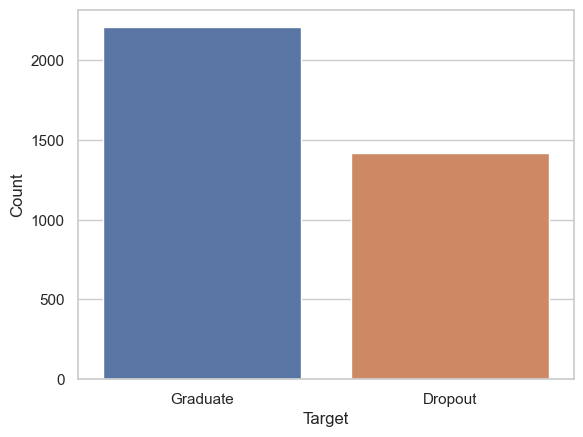

In [ ]:
target_df = pd.DataFrame(df1['target'].value_counts()).reset_index()

target_df.rename(columns = {'index': 'Target',
                            'target': 'Count'}, inplace=True)

sns.barplot(x='Target', y='Count', data=target_df, order=['Graduate', 'Dropout'])
plt.show()

#. Conclusion: There is an imbalance in the given dataset, where graduates are over represented in the data.

#### Using the SMOTE to oversample the minority classes

In [ ]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
x_t, target_t = oversample.fit_resample(X, y)


In [ ]:
target_t.value_counts()

1    2209
0    2209
Name: target, dtype: int64

### Implementing Logistic Regression, xgboost, randomForest using 80/20 split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

### Building Logistic Regression, Random Forest Classification and XGBoost Algorithms for classification

#### Using Logistic Regression Classifier

In [ ]:
lr1 = LogisticRegression()

lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)

accuracy_score(y_test, y_pred)

0.9201101928374655

#### Using Random Forest Classifier model

In [ ]:
rf1 = RandomForestClassifier()

rf1.fit(X_train, y_train)

y_pred_rf = rf1.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.9077134986225895

#### Using XGBoost Algorithm for Classification

In [ ]:
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train, y_train)

y_pred_xgb1 = xgb_classifier.predict(X_test)

accuracy_score(y_test, y_pred_xgb1)

0.9035812672176309

## Using K-fold cross validation to perform the data splits

### Since the training set is small, we will train the models after the k-fold data splits

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

#### Testing for different values of k in k-fold we train and models and assess the accuracies

In [ ]:


for k in [4, 5, 6, 8, 10]:


    lr2 = LogisticRegression()
    rf2 = RandomForestClassifier()
    xgb2 = xgb.XGBClassifier()

    print("Current value of k:", k)

    lr2_scores = cross_val_score(lr2, X, y, cv = k)
    print(f"Logistic Regression score for k = {k}: ", lr2_scores.mean())

    rf2_scores = cross_val_score(rf2, X, y, cv=k)
    print(f"Random forest score with k = {k} : ", rf2_scores.mean())

    xgb2_scores = cross_val_score(xgb2, X, y, cv = k)
    print(f"XGBoost classification score with k = {k} : ", xgb2_scores.mean())

    print()

Current value of k: 4
Logistic Regression score for k = 4:  0.9057826668738981
Random forest score with k = 4 :  0.8994482463851882
XGBoost classification score with k = 4 :  0.9008297553536129

Current value of k: 5
Logistic Regression score for k = 5:  0.9085399449035814
Random forest score with k = 5 :  0.903305785123967
XGBoost classification score with k = 5 :  0.9052341597796143

Current value of k: 6
Logistic Regression score for k = 6:  0.9071625344352617
Random forest score with k = 6 :  0.903581267217631
XGBoost classification score with k = 6 :  0.8991735537190083

Current value of k: 8
Logistic Regression score for k = 8:  0.9068866635547645
Random forest score with k = 8 :  0.9052334655891705
XGBoost classification score with k = 8 :  0.9002775184526068

Current value of k: 10
Logistic Regression score for k = 10:  0.9082644628099172
Random forest score with k = 10 :  0.9068870523415977
XGBoost classification score with k = 10 :  0.9046831955922864



#### Enhancing the Random-Forest algorithm to fine-tune the model for better performance
 - Performing Grid-search for random-forest model fine tuning while using cross-validation (k=10)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_3 = RandomForestClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 5, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

selected_val_k = 10
# Create a K-fold cross-validation object
kfold = KFold(n_splits = selected_val_k, shuffle = True, random_state = 42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_3, param_grid, cv=kfold)
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9049586776859504


In [ ]:
grid_search

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50]})

### Retraining the Model using Random Forest Algorithm with best parameter settings - On Train set

In [ ]:
rf_eval = RandomForestClassifier(max_depth=10,
                                  min_samples_leaf = 4,
                                  min_samples_split = 2,
                                  n_estimators = 50)

rf_eval.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50)

### Evaluating the Model performance on the Test dataset

In [ ]:
train_score = accuracy_score(y_train, rf_eval.predict(X_train))
test_score = accuracy_score(y_test, rf_eval.predict(X_test))

print(f"Model Performance on Training set: {round(train_score * 100, 2)}%")
print(f"Model Performance on Test set: {round(test_score * 100, 2)}%")



Model Performance on Training set: 93.25%
Model Performance on Test set: 90.91%


#### Re-training the model to include the entire dataset

In [ ]:
rf_final = RandomForestClassifier(max_depth=10,
                                  min_samples_leaf = 4,
                                  min_samples_split = 2,
                                  n_estimators = 50)

overall_model_accuracy = accuracy_score(y, rf_final.predict(X))
print(f"Overall model accuracy: {round(overall_model_accuracy * 100, 2)} %", )

Overall model accuracy: 92.95 %


#### Using the above Model we can assess which input features helped Predicting the target feature

(59,)

In [ ]:
fi_df = pd.DataFrame({'feature_names': list(X.columns),
                      'feature_importance': rf_final.feature_importances_})

fi_df.sort_values(by = 'feature_importance', ascending=False, inplace=True)

In [ ]:
fi_df

,feature_names,feature_importance
19,2nd_sem_appv,0.265813
20,2nd_sem_grade,0.165835
13,1st_sem_appv,0.139992
14,1st_sem_grade,0.104959
7,tuition_fee_upto_date,0.074857
18,2nd_sem_eval,0.037832
11,1st_sem_enrl,0.028032
12,1st_sem_eval,0.024521
6,debtor,0.022068
9,scholarship_holder,0.021238


#### Creating the Barplot to generate feature importance

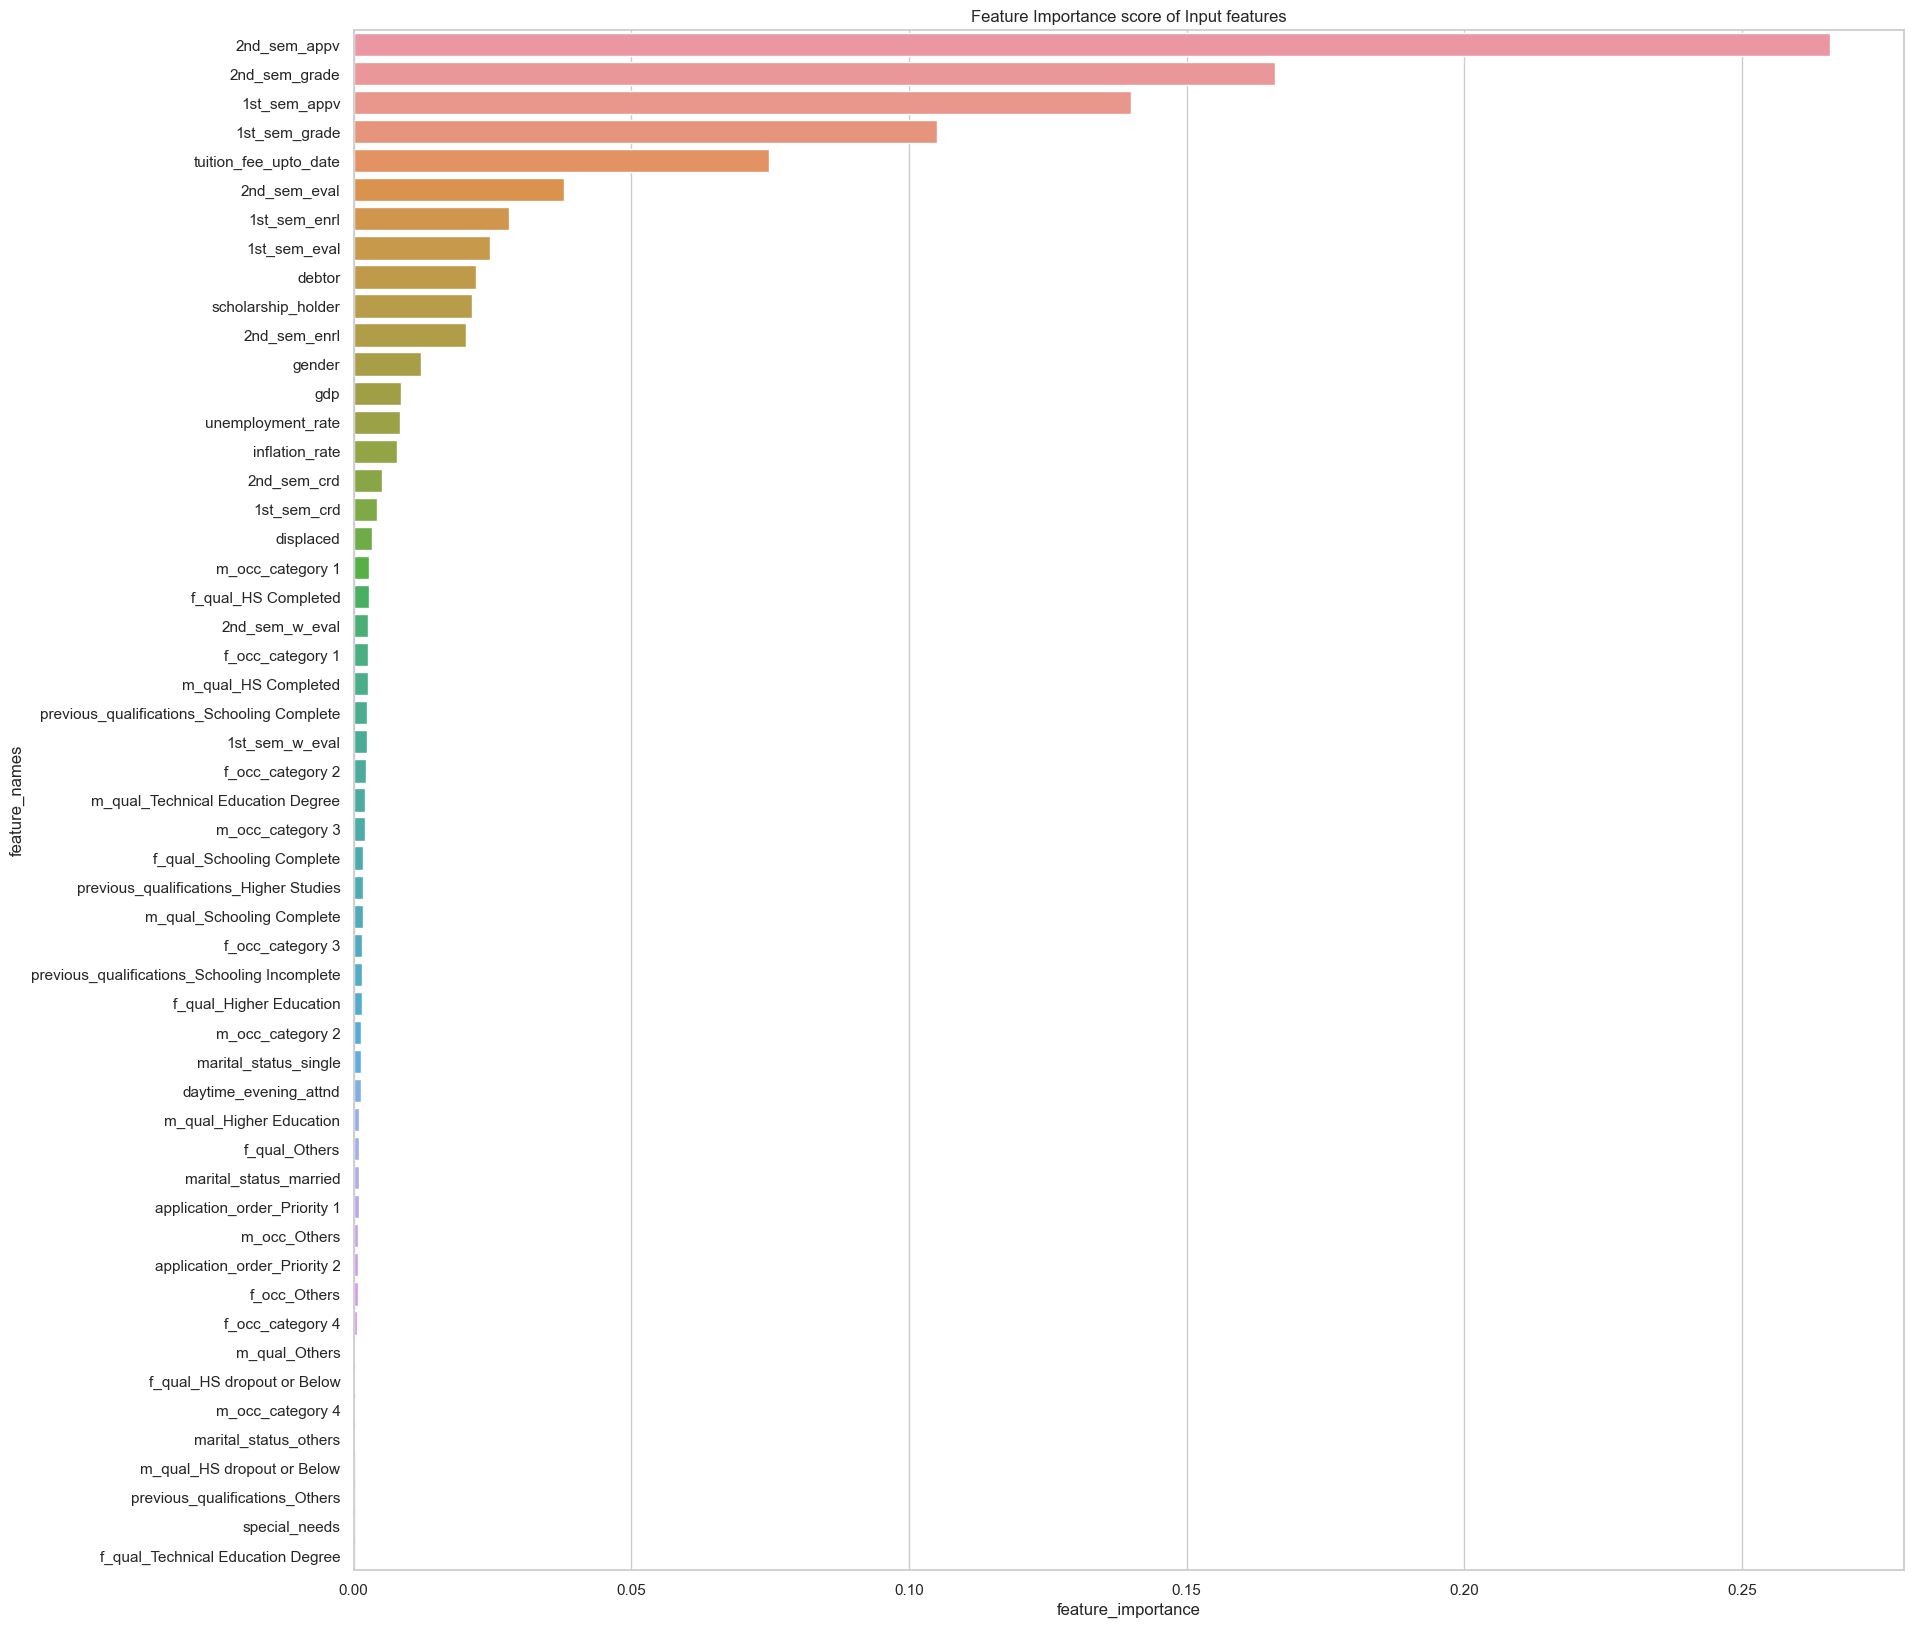

In [ ]:

plt.figure(figsize=(20, 20))
# Create the horizontal plot using Seaborn
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, orient='h')

# Display the plot
plt.title("Feature Importance score of Input features")
plt.show()

# Conclusion: The horizontal bar plot shows how different features of the dataset relate with the target.

### Writing the models and the files to disk

In [ ]:
fi_df.to_csv('./feature_importance.csv', index = False)

#### Writing datasets to file

In [ ]:
X_train.to_csv('./xtrain.csv', index = False)
X_test.to_csv('./xtest.csv', index = False)
y_train.to_csv('./ytrain.csv', index = False)
y_test.to_csv('./ytest.csv', index = False)

#### Writing model file to disk

In [ ]:
import pickle

# Save the trained model to disk
filename = 'rf_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_final, file)

print("Model file written to disk")

Model file written to disk
